### **0. Setup**

In [10]:
import os, glob, warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family': 'Arial', 'size': 15}
mpl.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'
# my_pal = ['grey', 'mediumseagreen', 'dodgerblue']
# my_pal = ['grey', 'dodgerblue']
my_pal = ['grey', 'mediumseagreen', 'mediumblue', 'darkorange']

# set the directory where the data files are waiting
directory = '/Users/ShokenLEE/Desktop/DATA/Common data spreadsheets/DAG sensor/siCTDNEP1, siLpin1'

### **1. Concanatate all the CSV files**

In [2]:
df = pd.DataFrame()

for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith('csv'):
            _df = pd.read_csv(os.path.join(root, file))
            df = pd.concat([df, _df], axis=0)
            
# for file in os.listdir(directory):
#     if file.endswith('csv'):
#         _df = pd.read_csv(os.path.join(root, file))
#         df = pd.concat([df, _df], axis=0)            

In [3]:
df.head()
# df.tail()

,,FileName,Mean_whole,Mean_internal,Mean_periphery,Ratio
0,1,3-16-22 U2OS2xT#1 siCTDNEP1 71hr 488mNG t2-006...,133.981,22.072,32.679,1.481
1,2,3-16-22 U2OS2xT#1 siCTDNEP1 71hr 488mNG t2-006...,162.849,49.933,68.617,1.374
2,3,3-16-22 U2OS2xT#1 siCTDNEP1 71hr 488mNG t2-006...,200.215,91.838,82.915,0.903
3,4,3-16-22 U2OS2xT#1 siCTDNEP1 71hr 488mNG t2-006...,161.233,47.020,73.025,1.553
4,5,3-16-22 U2OS2xT#1 siCTDNEP1 71hr 488mNG t2-006...,143.436,33.305,34.029,1.022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 6
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   732 non-null    int64  
 1   FileName        732 non-null    object 
 2   Mean_whole      732 non-null    float64
 3   Mean_internal   732 non-null    float64
 4   Mean_periphery  732 non-null    float64
 5   Ratio           732 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.0+ KB


### **2. Add columns**

####  **Drug**

In [5]:
# df.loc[df['FileName'].str.contains('DMSO'), 'Drug'] = 'DMSO'
# df.loc[df['FileName'].str.contains('Propra'), 'Drug'] = 'Propranolol'

####  **siRNA**

In [5]:
df.loc[df['FileName'].str.contains('siCtrl'), 'siRNA'] = 'siCtrl'
df.loc[df['FileName'].str.contains('CTDNEP1'), 'siRNA'] = 'siCTDNEP1'
df.loc[df['FileName'].str.contains('Lpin1'), 'siRNA'] = 'siLpin1'
df.loc[df['FileName'].str.contains('NEP1R1'), 'siRNA'] = 'siNEP1R1'

####  **Constructs**

In [124]:
# df.loc[df['FileName'].str.contains('WT'), 'Plasmid'] = 'WT'
# df.loc[df['FileName'].str.contains('HA'), 'Plasmid'] = 'HA'

### **3. Cleaning**

####  **Drop zero value rows**

In [6]:
df_not_zero = df[df['Mean_whole'] !=0]

In [7]:
df_not_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 6
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   688 non-null    int64  
 1   FileName        688 non-null    object 
 2   Mean_whole      688 non-null    float64
 3   Mean_internal   688 non-null    float64
 4   Mean_periphery  688 non-null    float64
 5   Ratio           688 non-null    float64
 6   siRNA           688 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 43.0+ KB


### **4. Analysis**

#### **4-0. Quick check**

#### Number of cells

In [8]:
df_not_zero.groupby(['siRNA']).count()
# df_not_zero.groupby(['Drug']).count()

,,FileName,Mean_whole,Mean_internal,Mean_periphery,Ratio
siRNA,,,,,,
siCTDNEP1,276,276,276,276,276,276
siCtrl,209,209,209,209,209,209
siLpin1,150,150,150,150,150,150
siNEP1R1,53,53,53,53,53,53


#### NE enrichment score, Mean

In [23]:
df_not_zero.groupby(['siRNA'])['Ratio'].mean()

siRNA
siCTDNEP1    1.382442
siCtrl       1.929478
siLpin1      1.631267
siNEP1R1     1.588377
Name: Ratio, dtype: float64

Text(0.5, 1.0, 'Ratio of DAG sensor localization: Nuclear rim vs intra-nucleus')

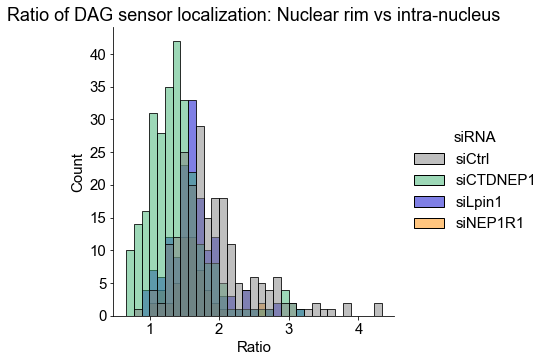

In [11]:
hist = sns.displot(data=df_not_zero, x='Ratio', hue='siRNA', hue_order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
plt.title('Ratio of DAG sensor localization: Nuclear rim vs intra-nucleus')

#### **4-1. Check cell counts per sample**

[Text(0, 0, 'siCtrl'),
 Text(1, 0, 'siCTDNEP1'),
 Text(2, 0, 'siLpin1'),
 Text(3, 0, 'siNEP1R1')]

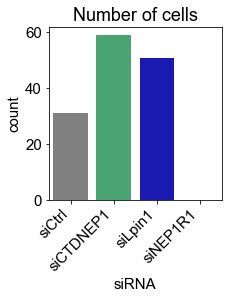

In [103]:
fig_width, fig_height = 3.0, 3.0
fig = plt.figure(figsize=(fig_width,fig_height))
# fig = plt.figure()
ax_count = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_count = sns.countplot(data=df_not_zero, x='siRNA', order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Number of cells')
ax_count.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')

In [104]:
df.groupby(['siRNA']).size()

siRNA
siCTDNEP1    62
siCtrl       32
siLpin1      53
dtype: int64

#### **4-2. Ratio of DAG sensor localization: rim vs inside nucleus**

[Text(0, 0, 'siCtrl'),
 Text(1, 0, 'siCTDNEP1'),
 Text(2, 0, 'siLpin1'),
 Text(3, 0, 'siNEP1R1')]

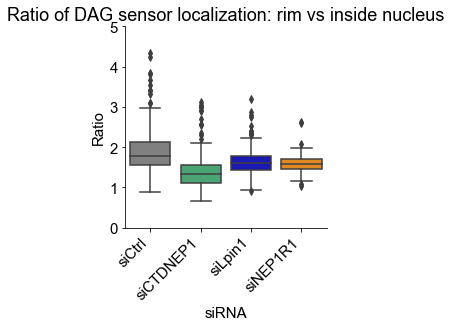

In [16]:
fig = plt.figure(figsize=(3.5,3.5))
ax_box = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_box = sns.boxplot(data=df_not_zero, x='siRNA', y='Ratio', order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
# ax_box = sns.boxplot(data=df_not_zero, x='siRNA', y='Ratio', order=['WT', 'HA'], palette=my_pal)
# ax_box = sns.boxplot(data=df_not_zero, x='Drug', y='Ratio', order=['DMSO', 'Propranolol'], palette=my_pal)
# ax_box = sns.boxplot(data=df_not_zero, x='Drug', y='Ratio', order=['Propranolol'], palette=['dodgerblue'])

plt.title('Ratio of DAG sensor localization: rim vs inside nucleus')
plt.ylabel('Ratio')
plt.ylim([0,5])

ax_box.spines['top'].set_visible(False)
ax_box.spines['right'].set_visible(False)


ax_box.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')
# ax_box.set_xticklabels(labels=['DMSO', 'Propranolol'], rotation=45, ha='right')
# ax_box.set_xticklabels(labels=['Propranolol'], rotation=45, ha='right')

In [17]:
fig.savefig(directory + '/Ratio_box.pdf', bbox_inches='tight', transparent=True)

[Text(0, 0, 'siCtrl'),
 Text(1, 0, 'siCTDNEP1'),
 Text(2, 0, 'siLpin1'),
 Text(3, 0, 'siNEP1R1')]

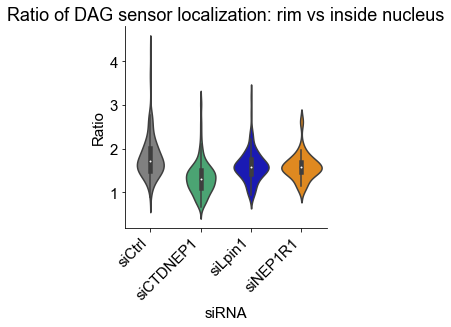

In [56]:
fig = plt.figure(figsize=(3.5,3.5))
ax_vio = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_vio = sns.violinplot(data=df_not_zero, x='siRNA', y='Ratio', order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
plt.title('Ratio of DAG sensor localization: rim vs inside nucleus')
plt.ylabel('Ratio')
ax_vio.spines['top'].set_visible(False)
ax_vio.spines['right'].set_visible(False)
ax_vio.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')

In [20]:
fig.savefig(directory + '/Ratio_violin.jpg', bbox_inches='tight')

#### **4-3. Overall mean intensity in nucleus**

[Text(0, 0, 'siCtrl'),
 Text(1, 0, 'siCTDNEP1'),
 Text(2, 0, 'siLpin1'),
 Text(3, 0, 'siNEP1R1')]

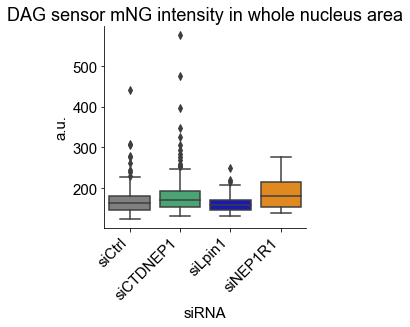

In [57]:
fig = plt.figure(figsize=(3.5,3.5))
ax_box = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_box = sns.boxplot(data=df_not_zero, x='siRNA', y='Mean_whole', order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
plt.title('DAG sensor mNG intensity in whole nucleus area')
plt.ylabel('a.u.')
ax_box.spines['top'].set_visible(False)
ax_box.spines['right'].set_visible(False)
ax_box.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')

In [23]:
fig.savefig(directory + '/Mean_whole.jpg', bbox_inches='tight')

#### **4-4. Correlation b/w whole mean intensity and ratio values**

#### Limited to those with mean_whole less than 300

(124.653, 300.0)

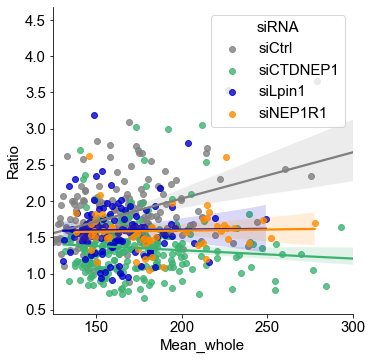

In [75]:
scatter = sns.lmplot(x='Mean_whole', y='Ratio', data=df_not_zero, 
                     hue='siRNA', hue_order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], 
                     palette=my_pal, legend_out=False)
min = np.min(df_not_zero['Mean_whole'])
plt.xlim([min,300])

In [25]:
scatter.savefig(directory + '/Mean_vs_Ratio_scatter.jpg', bbox_inches='tight')

#### **4-5. Tukey test**

In [13]:
res = pairwise_tukeyhsd(df['Ratio'], df['siRNA'], alpha=0.05)

In [14]:
print(res)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
siCTDNEP1   siCtrl   0.6251  0.001  0.4932  0.7571   True
siCTDNEP1  siLpin1   0.3505  0.001  0.2037  0.4974   True
siCTDNEP1 siNEP1R1    0.077 0.7413 -0.1276  0.2816  False
   siCtrl  siLpin1  -0.2746  0.001 -0.4313 -0.1179   True
   siCtrl siNEP1R1  -0.5481  0.001 -0.7599 -0.3364   True
  siLpin1 siNEP1R1  -0.2735 0.0083 -0.4949 -0.0522   True
---------------------------------------------------------
